## Fall 2020 CS4641 B Homework 3

## Instructor: Rodrigo Borela Valente

## Deadline: October 26th, Monday, 11:59 pm

* No unapproved extension of the deadline is allowed. Late submission will lead to 0 credit. 

* Discussion is encouraged on Piazza as part of the Q/A. However, all assignments should be done individually.

## Structure

Homework 3 will have two components to it: 
* Programming (to be submitted to "A3 programming")
* Theory (to be submitted to "A3 Written")

**Note** - There will be 2 more gradescope folders
1. For Early bird submission (Programming: either PCA image compression (Q2) OR Ridge Regression (Q4.1))
2. For Bonus questions (Theory: Q5 and Q6)

**Note**
- Early Bird Special: If you can submit either of Q2 or Q4.1 (both programming) by October 19th, you get a bonus of 5 points for this assignment.
- Irrespective of whether you submit an answer for early bird, submit it again in A3 programming for the final submission.

**Note** - Points for each question are mentioned in their respective cells and the questions are present in this ipynb file.
There is programming portion in this Jupyter notebook along with the theory questions. The homework is worth a total of 150 points, where 30 of these are bonus points. The grading breakdown is as follows:
 
1. Programming (90 pts)
    - 1.2, 2, 3.1, 4.1
2. Theory (30 pts + 30 pts{BONUS}):
    - 1.1, 3.2, 4.2, 4.3, 5, 6

**Total = 150 pts**






## Instructions for the assignment

- We will be using Gradescope for submission and grading.

- For the written (non-programming) part of the assignment
    - Your write up must be submitted in PDF form, you may use either Latex or markdown, whichever you prefer. We will **not accept hand-written work**.
    - If you are using a latex/markdown editor, please make sure to start answering each question on a new page. It makes it more organized to map your answers on GradeScope. When submitting your assignment, you must **correctly map pages** of your PDF to each question/subquestion where they appear. Improperly mapped questions may not be graded correctly.


- To create a pdf of your jupyter notebook, on the top left hand corner click on "File"->"Download as"->"pdf (.pdf)". 

- When uploading the pdf for the written portion of the assignment, please map the questions to pages were your solution begins (as was done for assignment 1 and 2).

- Submit the programming solutions to their respective folders on gradescope as per the instructions given below



## Using the autograder

- You will submit your code (.py files) for the autograder in the following folders:

    - "A3 Programming":
        * nb.py
        * imgcompression.py
        * dimensionality.py
        * regression.py
        
    - "A3 Early Bird":
        * imgcompression.py
        * regression.py

- All you will have to do is to copy your implementations of the classes "Naive_Bayes", "ImgCompression", "Dimensionality", "Regression" onto the respective files. We provided you different .py files and we added libraries in those files please DO NOT remove those lines and add your code after those lines. Note that these are the only allowed libraries that you can use for the homework.

- You are allowed to make as many submissions until the deadline as you like. Additionally, note that the autograder tests each function separately, therefore it can serve as a useful tool to help you debug your code if you are not sure of what part of your implementation might have an issue.

- **For the "HW3 - Non-programming" part, you will create a pdf (as was done for the theory portion of assignment 1 and 2) and submit it on Gradescope.**


In [361]:
# Required imports 
# Nothing to change

import numpy as np
import json
from matplotlib import pyplot as plt
from sklearn.feature_extraction import text
from sklearn.datasets import load_boston, load_diabetes, load_digits, load_breast_cancer, load_iris, load_wine
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import floyd_warshall
%matplotlib inline

## 1. Naive Bayes Classification [30pts]

In Bayesian classification, we're interested in finding the probability of a label given some observed feature vector $x = [x_{1},.., x_{d}]$, which we can write as $P(y~|~{ x_{1},.., x_{d}})$.
Bayes's theorem tells us how to express this in terms of quantities we can compute more directly:

\begin{eqnarray} 
P(y~|~{ x_{1},.., x_{d}}) = \frac{P({ x_{1},.., x_{d}}~|~y)P(y)}{P({ x_{1},.., x_{d}})} 
\end{eqnarray}


The main assumption in Naive Bayes is that, given the label, the observed features are conditionally independent i.e. 

$$
P({ x_{1},.., x_{d}}~|~y) = P({x_{1}}~|~y) \times .. \times P({x_{d}}~|~y)    
$$

Therefore, we can rewrite Bayes rule as

\begin{eqnarray}
P(y~|~{ x_{1},.., x_{d}}) = \frac{P({x_{1}}~|~y) \times .. \times P({x_{d}}~|~y)P(y)}{P({ x_{1},.., x_{d}})}
\end{eqnarray}

### Training Naive Bayes
One way to train a Naive Bayes classifier is done using frequentist approach to calculate probability, which is simply going over the training data and calculating the frequency of different observations in the training set given different labels. For example,  
\begin{eqnarray}
P({x_{1}=i}~|~y=j) &=& \frac{P({x_{1}=i}, y=j)}{P(y=j)} =  \frac{\text{Number of times in training data } x_{1}=i \text{ and } y=j }{\text{Total number of times in training data } y=j}
\end{eqnarray}

### Testing Naive Bayes

During the testing phase, we try to estimate the probability of a label given an observed feature vector. We combine the probabilities computed from training data to estimate the probability of a given label. For example, if we are trying to decide between two labels $y_{1}$ and $y_{2}$, then we compute the ratio of the posterior probabilities for each label:

\begin{eqnarray}
\frac{P(y_{1}~|~ x_{1},.., x_{d})}{P(y_2~|~x_{1},.., x_{d})} = \frac{P(x_{1},.., x_{d}~|~y_{1})}{P(x_{1},.., x_{d}~|~y_{2})}\frac{P(y_1)}{P(y_2)}= \frac{P({x_{1}}~|~y_{1}) \times .. \times P({x_{d}}~|~y_{1})P(y_{1})}{P({x_{1}}~|~y_{2}) \times .. \times P({x_{d}}~|~y_{2})P(y_{2})}
\end{eqnarray}

All we need now is to compute $P(x_{1}|y_{i}),.., P(x_{d}~|~y_i)$ and $P(y_{i})$ for each label by pluging in the numbers we got during training. The label with the higher posterior probabilities is the one that is selected.

### 1.1 Spam Detection [10pts] <span style="color:green">**[W]**</span>

Naive Bayes Classifier is one of the oldest methods used in spam detection. In spam detection, each word is taken as a feature and the label is spam or not_spam. Now consider the following e-mail subjects:

| Subject | Label |
|---------|-------|
| Free gift | spam |
| Gift offer | spam |
| Credit gift | not spam |
| Free class | not spam |

Based on the above data using Naive Bayes Classifiaction, can you tell if a mail with a subject line - **Your gift**
* is spam or not?
* How did you conclude this?

Note: Ignore case and any unknown words


### 1.2 Spam Detection [20pts] <span style="color:green">**[P]**</span>

Now that you have some idea on how spam classification is done, we will implement this programatically for a larger dataset. 

You are given spam and clean emails. We have extracted the words for you from the emails. You need to implement a Naive Bayesian classification algorithm that can determine if a set of new mails are spam or not. 

We have provided small tests to check your implementation (they will not be considered for grading). Use the autograder to check your final implementation.

Code for submitting to autograder must be in **nb.py**. Just paste the implemented functions in nb.py.

In [362]:
import numpy as np
import json
from sklearn.feature_extraction import text

class Naive_Bayes():

    def __init__(self): 
        ## NOTHING TODO
        # load emails
        x = open('emails.txt').read()
        emails = json.loads(x)
        
        # get previous spam emails (spam), non spam emails (not_spam), unclassified input mails (to_classify)
        spam = emails["spam"]
        not_spam = emails["not_spam"]
        to_classify = emails["to_classify"]
        
        # Number of emails
        n_spam = len(spam)
        n_not_spam = len(not_spam)
        n_to_classify = len(to_classify)
        
        ''' To ignore certain common words in English that might skew your model, we add them to the stop words 
         list below. You may want to experiment by choosing your own list of stop words, 
         but be sure to keep subject in this list at a minimum, as it appears in every email content.'''
        stop_words = text.ENGLISH_STOP_WORDS.union({'subject'})        
        
        # Form bag of words model using words used at least 10 times
        vectorizer = text.CountVectorizer(stop_words=stop_words,min_df=10)
        X = vectorizer.fit_transform(spam+not_spam+to_classify).toarray()
        
        # split word counts into separate matrices
        self.X_spam, self.X_not_spam, self.X_to_classify = X[:n_spam,:], X[n_spam:n_spam+n_not_spam,:], X[n_spam+n_not_spam:,:]

    def _likelihood_ratio(self, X_spam, X_not_spam): #[7 pts] 
        '''
        Args:
            X_spam: n_spam x d where n_spam is the number of spam emails,
                and d is the number of unique words that were there in all the emails
            X_not_spam: n_not_spam x d where n_not_spam is the number of good emails,
                and d is the number of unique words that were there in all the emails
        Return:
            ratio: 1 x d vector of the likelihood ratio of different words (spam/not_spam)
        '''
        
        '''
        Hints: 
            The value of X_spam[i][j] gives the number of times the jth word appears in the ith email
            Likelihood is P(words|class)
            Add 1 to avoid all zeros result
        '''
        ######### TODO #########
        # estimate probability of each word in vocabulary being used in spam
        p_spam = (1 + X_spam.sum(axis=0)) / (sum(np.sum(a) for a in X_spam) + X_spam.shape[1])
        # estimate probability of each word in vocabulary being used in clean emails
        p_not_spam = (1 + X_not_spam.sum(axis=0)) / (sum(np.sum(a) for a in X_not_spam) + X_not_spam.shape[1])
        # compute ratio of these probabilities
        return p_spam / p_not_spam

    def _priors_ratio(self, X_spam, X_not_spam): #[7 pts]
        '''
        Args:
            X_spam: n_spam x d where n_spam is the number of spam emails,
                and d is the number of unique words that were there in all the emails
            X_not_spam: n_not_spam x d where n_not_spam is the number of good emails,
                and d is the number of unique words that were there in all the emails
        Return:
            pr: prior ratio of (spam/not_spam)
        '''
        ######### TODO #########
        
        # Compute prior probabilities
        return sum(np.sum(a) for a in X_spam) / sum(np.sum(a) for a in X_not_spam)

    def classify_spam(self, likelihood_ratio, pratio, X_to_classify): #[6 pts]
        '''
        Args:
            likelihood_ratio: 1 x d vector of ratio of likelihoods of different words
            pratio: a scalar
            X_to_classify: bag of words representation of the unknown emails. k x d, where 
                k is the number of emails to classify and d is the number of unique words that were there in all the emails
        Return:
             resolved: 1 x k list, each entry is 'S' to indicate spam or 'NS' to indicate not spam. 
             k is the number of emails to classify
        '''
        ######### TODO #########
        
        # Iterate over emails (for loop allowed to go through the unclassified emails)
        
        # Compute likelihood ratio for Naive Bayes model
        
        # if posterior is greater than 0.5 classify it as spam ('S')
        resolved = []
        for email in X_to_classify:
            if np.prod(likelihood_ratio ** email) * pratio > 0.5:
                resolved.append('S')
            else:
                resolved.append('NS')
        return resolved

In [363]:
# No need to modify
# check _likelihood_ratio method
'''
Hint:
    X_spam, X_not_spam and X_to_classify will be similar to the ones used below. 
    Let the bag of words be ['gift', 'thanks' ,'free']. 
    Take [0,1,3] for example, this means that the word gift appears 0 times in the first X_spam email 
    and 1 time in the first non_spam email.
'''
NB = Naive_Bayes()
X_spam = np.array([[0,1,3],[0,1,1]])
X_not_spam = np.array([[1,4,0]])
likelihood_ratio = NB._likelihood_ratio(X_spam, X_not_spam)
print("Expected likelihood ratio: [0.44444444 0.53333333 4.44444444]")
print("Your likelihood ratio: ", likelihood_ratio)

Expected likelihood ratio: [0.44444444 0.53333333 4.44444444]
Your likelihood ratio:  [0.44444444 0.53333333 4.44444444]


In [364]:
# No need to modify
# check _priors_ratio
pratio = NB._priors_ratio(X_spam, X_not_spam)
print("Expected priors ratio: 1.2")
print("Your priors ratio: ", pratio)

Expected priors ratio: 1.2
Your priors ratio:  1.2


In [365]:
# No need to modify
# check classify_spam
unknown_email = np.array([[0,1,6],[0,7,2]])
classified_output = NB.classify_spam(likelihood_ratio, pratio, unknown_email)
print("Expected classified output: ['S', 'NS']")
print("Your classified output: ", classified_output)

Expected classified output: ['S', 'NS']
Your classified output:  ['S', 'NS']


In [366]:
# No need to modify
# Classifier on a dataset
NB = Naive_Bayes()
likelihood_ratio = NB._likelihood_ratio(NB.X_spam, NB.X_not_spam)
pratio = NB._priors_ratio(NB.X_spam, NB.X_not_spam)
resolved = NB.classify_spam(likelihood_ratio, pratio, NB.X_to_classify)
print("Expected classified output: ['S', 'NS', 'NS', 'NS', 'NS']")
print("Your classification output: ", resolved)

Expected classified output: ['S', 'NS', 'NS', 'NS', 'NS']
Your classification output:  ['S', 'NS', 'NS', 'NS', 'NS']


## 2. Image compression with PCA [30 pts]


### Load images data and plot


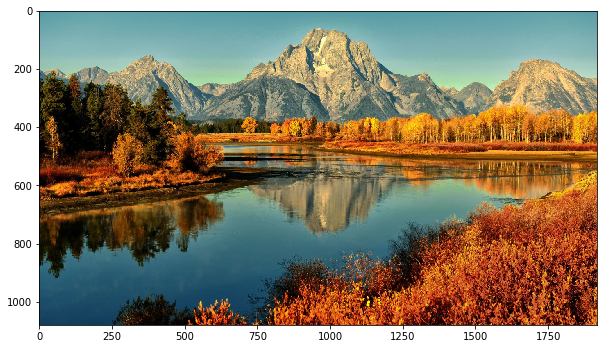

In [367]:
# Helper Function No need to modify
# load Image
image = plt.imread("hw3_img.jpg")/255.
#plot image
fig = plt.figure(figsize=(10,10))
plt.imshow(image)
plt.show()

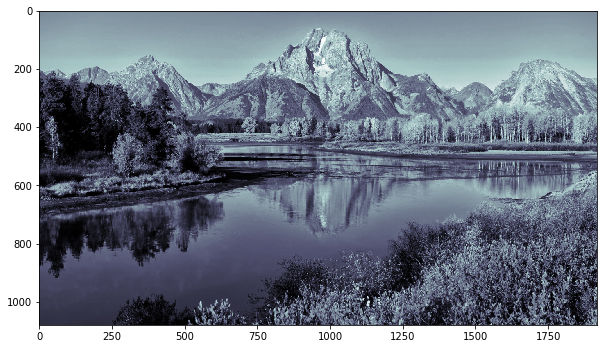

In [368]:
# Helper Function No need to modify
def rgb2gray(rgb):   
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

fig = plt.figure(figsize=(10, 10))
# plot several images
plt.imshow(rgb2gray(image), cmap=plt.cm.bone)
plt.show()

### 2.1 Image compression [30pts]  <span style="color:blue">**[P]**</span>

The SVD allows us to compress an image by throwing away the least important information.  The greater the singular values -> the greater the variance -> most information from the corresponding singular vector. SVD each matrix and get rid of the small singular values to compress the image. The loss of information is negligible as the difference is very difficult to be spotted. [Principal Component Analysis](https://en.wikipedia.org/wiki/Principal_component_analysis) (PCA) follows the same process to elimate the small variance eigenvalues and their vectors.  With PCA, we center the data first by subtracting the mean. Each singular value tells us how much of the variance of a matrix (e.g. image) is captured in each component.  For example, the variance captured by the first component is $$\frac{\sigma_1}{\sum_{i=1}^n \sigma_i}$$ where $\sigma_i$ is the $i^{th}$ singular value. You need to finish the following functions to do SVD and then reconstruct the image by components.

Code for submitting to autograder must be in **imgcompression.py**. 
Just paste the implemented functions in imgcompression.py.

Reference for compression_ratio: http://timbaumann.info/svd-image-compression-demo/

In [369]:
from matplotlib import pyplot as plt
import numpy as np

class ImgCompression(object):
    def __init__(self):
        pass

    def svd(self, X): # [7.5pts]
        """
        Do SVD. You could use numpy SVD.
        Your function should be able to handle black and white
        images (N x D arrays) as well as color images (N x D x 3 arrays)
        In the image compression, we assume that each colum of the image is a feature. Image is the matrix X.
        Args:
            X: N x D array corresponding to an image (N x D x 3 if color image)
        Return:
            U: N x N (N x N x 3, for color images)
            S: min(N, D) x 1 (min(N, D) x 3, for color images)
            V: D x D (D x D x 3, for color images)
        """
        if len(X.shape) < 3:
            return np.linalg.svd(X)
        U, S, V = np.linalg.svd(np.transpose(X, (2, 0, 1)))
        return np.transpose(U, (1, 2, 0)), np.transpose(S, (1, 0)), np.transpose(V, (1, 2, 0))


    def rebuild_svd(self, U, S, V, k): # [7.5pts]
        """
        Rebuild SVD by k componments.
        Args:
            U: N x N (N x N x 3, for color images)
            S: min(N, D) x 1 (min(N, D) x 3, for color images)
            V: D x D (D x D x 3, for color images)
            k: int corresponding to number of components
        Return:
            Xrebuild: N x D array of reconstructed image (N x D x 3 if color image)

        Hint: numpy.matmul may be helpful for reconstructing color images
        """
        if len(U.shape) < 3:
            return np.dot(U[:, :k], np.dot(np.diag(S[:k]), V[:k]))
        S_new = np.zeros((3, k, k))
        diag = np.arange(k)
        S_new[:, diag, diag] = np.transpose(S, (1, 0))[:, :k]
        return np.transpose(np.transpose(U, (2, 0, 1))[:, :, :k] @ S_new @ np.transpose(V, (2, 0, 1))[:, :k], (1, 2, 0))


    def compression_ratio(self, X, k): # [7.5pts]
        """
        Compute compression of an image: (num stored values in compressed)/(num stored values in original)
        Args:
            X: N x D array corresponding to an image (N x D x 3 if color image)
            k: int corresponding to number of components
        Return:
            compression_ratio: float of proportion of storage used by compressed image
        """
        N, D = X.shape[0], X.shape[1]
        return (N * k + k + k * D) / N / D


    def recovered_variance_proportion(self, S, k): # [7.5pts]
        """
        Compute the proportion of the variance in the original matrix recovered by a rank-k approximation

        Args:
           S: min(N, D) x 1 (min(N, D) x 3 for color images) of singular values for the image
           k: int, rank of approximation
        Return:
           recovered_var: int (array of 3 ints for color image) corresponding to proportion of recovered variance
        """
        return sum(S[:k]**2) / sum(S**2)

### 2.2 Black and white 
Use your implementation to generate a set of images compressed to different degrees.
(no need to submit the images)

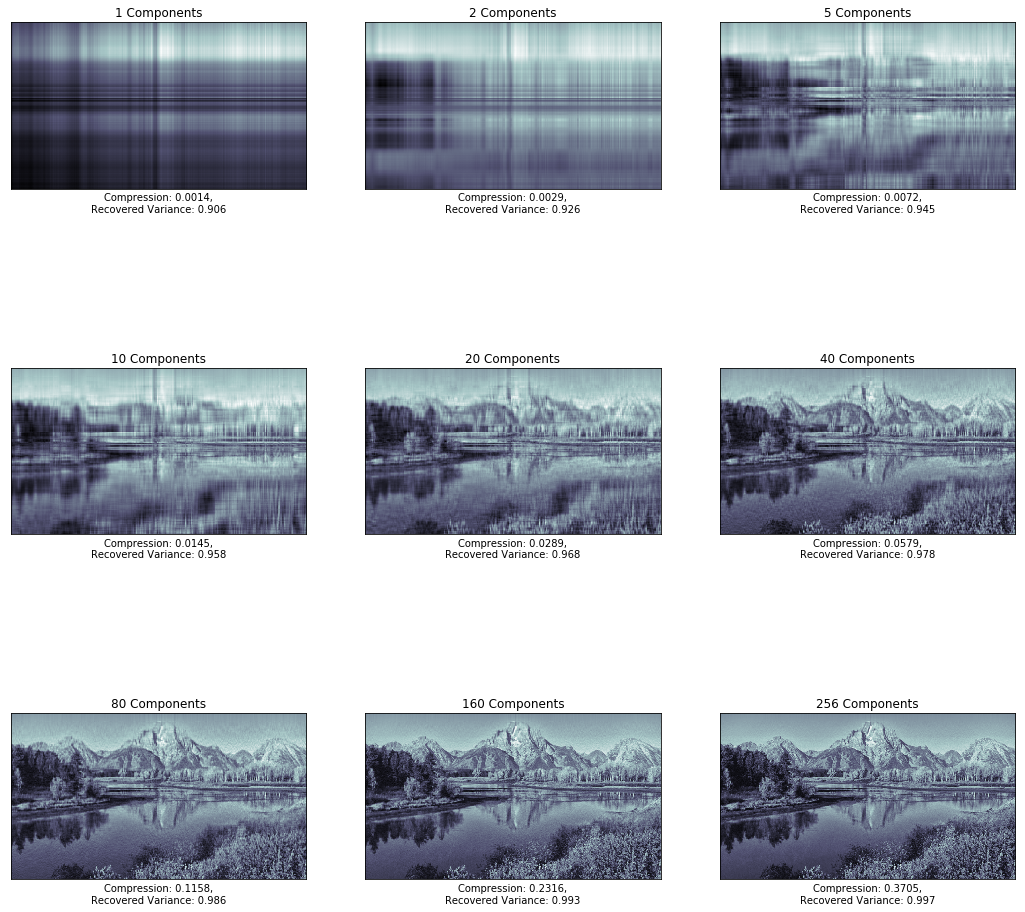

In [370]:
#helper do not need to change
imcompression = ImgCompression()
bw_image = rgb2gray(image)
U, S, V = imcompression.svd(bw_image)
component_num = [1,2,5,10,20,40,80,160,256]

fig = plt.figure(figsize=(18, 18))

# plot several images
i=0
for k in component_num:
    img_rebuild = imcompression.rebuild_svd(U, S, V, k)
    c = np.around(imcompression.compression_ratio(bw_image, k), 4)
    r = np.around(imcompression.recovered_variance_proportion(S, k), 3)
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    ax.imshow(img_rebuild, cmap=plt.cm.bone)
    ax.set_title(f"{k} Components")
    ax.set_xlabel(f"Compression: {c},\nRecovered Variance: {r}")
    i = i+1

### 2.3 Color image
Use your implementation to generate a set of images compressed to different degrees. 
(no need to submit the images)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


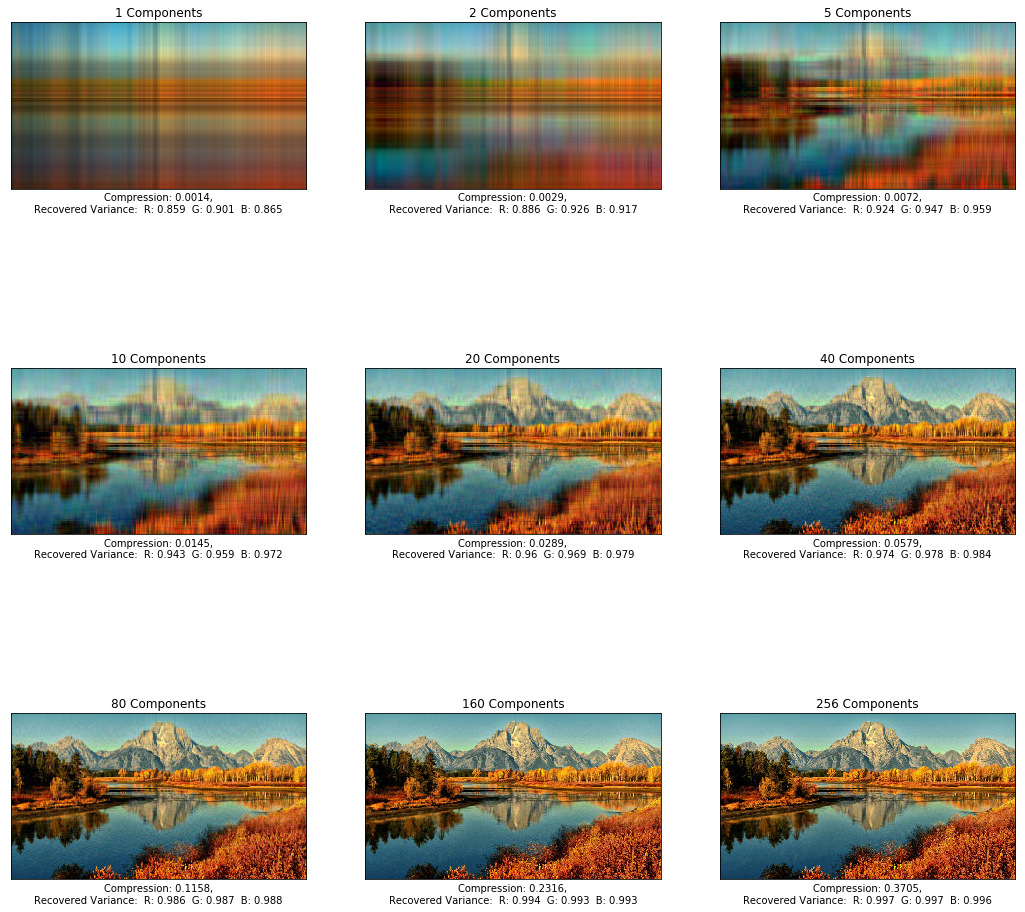

In [371]:
#helper do not need to change
imcompression = ImgCompression()
U, S, V = imcompression.svd(image)
component_num = [1,2,5,10,20,40,80,160,256]

fig = plt.figure(figsize=(18, 18))

# plot several images
i=0
for k in component_num:
    img_rebuild = imcompression.rebuild_svd(U, S, V, k)
    c = np.around(imcompression.compression_ratio(image, k), 4)
    r = np.around(imcompression.recovered_variance_proportion(S, k), 3)
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    ax.imshow(img_rebuild)
    ax.set_title(f"{k} Components")
    ax.set_xlabel(f"Compression: {np.around(c,4)},\nRecovered Variance:  R: {r[0]}  G: {r[1]}  B: {r[2]}")
    i = i+1

## 3 Understanding PCA [20 pts] 

In this problem, we will investigate how PCA can be used to improve features for regression and classification tasks and how the data itself affects the behavior of PCA. Implement PCA in the below cell. 

### 3.1 Intrinsic Dimensionality [10 pts] <span style="color:green">**[P]**</span>
Assume a dataset is composed of N datapoints, each of which has D features with D < N.  The *dimension* of our data would be $D$. It is possible, however, that many of these dimensions contain redundant information.  The *intrinsic dimensionality* is the number of dimensions we need to reconstruct our data with high fidelity.  For our purposes, we will define the intrinsic dimension as the number of principal components needed to reconstruct 99% of the variation within our data.  

We define a set of features as linearly independent if we cannot construct one out of a linear combination of the others. The number of linearly independent features is the number of nonzero principal components (where we define 0 is anything less than $10^{-11}$ due to floating point error). Zero principal components mean that we can not find any weights to linearly combine features in order to create an indenpendent feature. Thus, our algorithm will assign 0 to these weights.

Code for submitting to autograder must be in **dimensionality.py**. 
Just paste the implemented functions in dimensionality.py.

In [372]:
#helper do not need to change

from matplotlib import pyplot as plt
import numpy as np

# Uncomment this next line when copying to your dimensionality.py file
#from imgcompression import ImgCompression



class Dimensionality(object):
    def __init__(self):
        pass

    def pca(self, X):
        """
        Decompose dataset into principal components. 
        You may use your SVD function from the previous part in your implementation.

        Args: 
            X: N x D array corresponding to a dataset, in which N is the number of points and D is the number of features
        Return:
            U: N x N 
            S: min(N, D) x 1 
            V: D x D
        """

        return ImgCompression.svd(self, X)

    def intrinsic_dimension(self, S, recovered_variance=.99):
        """
        Find the number of principal components necessary to recover given proportion of variance

        Args: 
            S: 1-d array corresponding to the singular values of a dataset

            recovered_varaiance: float in [0,1].  Minimum amount of variance 
                to recover from given principal components
        Return:
            dim: int, the number of principal components necessary to recover 
                the given proportion of the variance
        """
        for dim in range(0, len(S)):
            if ImgCompression.recovered_variance_proportion(self, S, dim) >= recovered_variance:
                return dim

    def num_linearly_ind_features(self, S, eps=1e-11):
        """
        Find the number of linearly independent features in dataset

        Args: 
            S: 1-d array corresponding to the singular values of a dataset
        Return:
            dim: int, the number of linearly independent dimensions in our data
        """

        return len(S[S >= eps])


Use your above functions to find the intrinsic dimensionality and number of linearly independent components in the following datasets:
* Digits (handwritten digits)
* Breast Cancer
* Boston Housing
* Diabetes

In [373]:
#helper, don't need to change
dimensionality = Dimensionality()

digits = load_digits()
cancer = load_breast_cancer()
boston = load_boston()
diabetes = load_diabetes()

In [374]:
print("Total Features")
print("\tDigits", digits.data.shape[1])
print("\tBreast Cancer", cancer.data.shape[1])
print('\tBoston', boston.data.shape[1])
print('\tDiabetes', diabetes.data.shape[1])

Total Features
	Digits 64
	Breast Cancer 30
	Boston 13
	Diabetes 10


In [375]:
print("Linearly Independent Features:")
print("\tDigits", dimensionality.num_linearly_ind_features(dimensionality.pca(digits.data)[1]))
print("\tBreast Cancer", dimensionality.num_linearly_ind_features(dimensionality.pca(cancer.data)[1]))
print("\tBoston", dimensionality.num_linearly_ind_features(dimensionality.pca(boston.data)[1]))
print("\tDiabetes", dimensionality.num_linearly_ind_features(dimensionality.pca(diabetes.data)[1]))

Linearly Independent Features:
	Digits 61
	Breast Cancer 30
	Boston 13
	Diabetes 10


In [376]:
print("Intrinsic Dimensionality:")
print("\tDigits", dimensionality.intrinsic_dimension(dimensionality.pca(digits.data)[1]))
print("\tBreast Cancer", dimensionality.intrinsic_dimension(dimensionality.pca(cancer.data)[1]))
print("\tBoston", dimensionality.intrinsic_dimension(dimensionality.pca(boston.data)[1]))
print("\tDiabetes", dimensionality.intrinsic_dimension(dimensionality.pca(diabetes.data)[1]))

Intrinsic Dimensionality:
	Digits 33
	Breast Cancer 1
	Boston 2
	Diabetes 8


### 3.2 Feature Scaling [10 pts] <span style="color:green">**[W]**</span>

Principal component analysis is not agnostic to the scale of your features.  Measuring a feature with different units can change your principal components.

For this problem, randomly choose one column in each of the above datasets and multiply it by 1000.  For each of the datasets, answer the following:
1. How does this change the distribution of variance among the first 10 components?  
2. How does this change the first principal component of the data?
3. How does this affect the number of linearly independent components and intrinsic dimensionality?  Why?

It may be helpful to plot the variance captured by each component in a scree plot (see function below) and to make a bar plot of the absolute value of each feature in the first principal component. 

**Hint: Exploring the imported datasets (i.e. Boston, Diabetes, Digits, etc.) may help you understand the answers to these questions.**

#### Submit your analysis in the A3 written
1. Plot the bar and scree plots (before and after perturbing).
2. Refer to the plots and write the analysis.

The code you implement below doesn't have to be submitted (no autograder .py file for below code).

In [377]:
# helper fuctions
"""
Implementing these 3 functions are to aid in your analysis of feature scaling 
(referring to the plots)
(You don't have to submit this in programming section).
"""

def randomly_perturb_data(data, multiplier=1000):
    """
    Multiply a random column in data by multiplier
    
    Inputs:
        data: N*D numpy array of features
        multiplier: multiplier by which to perturb a random column in data
        
    Returns:
        perturbed_data: Data with random column multiplied by multiplier
    """
    perturbed_data = data[:, np.random.randint(data.shape[1])] * multiplier
    return perturbed_data
   
    
def scree_plot(S, n_components=10):
    """
    Plot proportion of variance contained in each individual component
    """
    sq = np.square(S[:n_components])
    plt.figure()
    plt.plot(np.arange(n_components), sq / np.sum(sq))
    plt.show()
    
def plot_component_vector(V):
    first_component = V[:, 0]
    plt.figure()
    plt.plot(np.arange(first_component))
    plt.show()

## 4 Polynomial regression and regularization [40 pts]

### 4.1 Ridge regression implementations [30 pts]<span style="color:blue">**[P]**</span>
We have three methods to fit a ridge regression model: 1) close form; 2) gradient descent (GD); 3) Stochastic gradient descent (SGD). We use the term weight in the following code. Weights and parameters ($\theta$) have the same meaning here. We used parameters ($\theta$) in the lecture slides.

Code for submitting to autograder must be in **regression.py**. Just paste the implemented functions in regression.py.

In [378]:
import numpy as np

class Regression(object):
    
    def __init__(self):
        pass
    
    def rmse(self, pred, label): # [5pts]
        '''
        This is the root mean square error.
        Args:
            pred: numpy array of length N x 1, the prediction of labels
            label: numpy array of length N x 1, the ground truth of labels
        Return:
            a float value
        '''
        return np.sqrt(np.mean(np.square(pred - label)))
    
    def construct_polynomial_feats(self, x, degree): # [5pts]
        """
        Args:
            x: numpy array of length N, the 1-D observations
            degree: the max polynomial degree
        Return:
            feat: numpy array of shape Nx(degree+1), remember to include 
            the bias term. feat is in the format of:
            [[1.0, x1, x1^2, x1^3, ....,],
             [1.0, x2, x2^2, x2^3, ....,],
             ......
            ]
        """
        return np.power(x.reshape(len(x), 1), np.arange(degree+1))


    def predict(self, xtest, weight): # [5pts]
        """
        Args:
            xtest: NxD numpy array, where N is number 
                   of instances and D is the dimensionality of each 
                   instance
            weight: Dx1 numpy array, the weights of linear regression model
        Return:
            prediction: Nx1 numpy array, the predicted labels
        """
        return np.dot(xtest, weight)

    # =================
    # RIDGE REGRESSION
        
    def ridge_fit_closed(self, xtrain, ytrain, c_lambda): # [5pts]
        """
        Args:
            xtrain: N x D numpy array, where N is number of instances and D is the dimensionality of each instance
            ytrain: N x 1 numpy array, the true labels
            c_lambda: floating number
        Return:
            weight: Dx1 numpy array, the weights of ridge regression model
        """
        lambda_matrix = c_lambda * np.identity(xtrain.shape[1])
        lambda_matrix[:,0] = 0
        return np.linalg.pinv(xtrain.T @ xtrain + lambda_matrix) @ xtrain.T @ ytrain

        
    def ridge_fit_GD(self, xtrain, ytrain, c_lambda, epochs=500, learning_rate=1e-7): # [5pts]
        """
        Args:
            xtrain: NxD numpy array, where N is number 
                    of instances and D is the dimensionality of each 
                    instance
            ytrain: Nx1 numpy array, the true labels
            c_lambda: floating number
        Return:
            weight: Dx1 numpy array, the weights of linear regression model
        """
        N, D = xtrain.shape
        weight = np.zeros((D, 1))
        for i in range(epochs):
            weight += (learning_rate / N) * (xtrain.T @ (ytrain - xtrain @ weight) - c_lambda * weight)
        return weight

    def ridge_fit_SGD(self, xtrain, ytrain, c_lambda, epochs=100, learning_rate=0.001): # [5pts]
        """
        Args:
            xtrain: NxD numpy array, where N is number 
                    of instances and D is the dimensionality of each 
                    instance
            ytrain: Nx1 numpy array, the true labels
        Return:
            weight: Dx1 numpy array, the weights of linear regression model
        """
        N, D = xtrain.shape
        weight = np.zeros((D, 1))
        for i in range(epochs):
            for j in range(N):
                weight += (learning_rate / N) * (xtrain.T @ (ytrain - xtrain @ weight) - c_lambda * weight)
        return weight
    

### 4.2 About RMSE [5pts] <span style="color:green">**[W]**</span>
Do you know whether this RMSE is good or not? If you don't know, we could normalize our labels between 0 and 1. After normalization, what does it mean when RMSE = 1? 

**Hint**: think of the way that you can enforce your RMSE = 1. Note that you can not change the actual labels to make RMSE = 1.

### 4.3 Testing: ridge regression [5 pts] <span style="color:green">**[W]**</span>

Let's first construct a dataset for polynomial regression.
In this case, we construct the polynomial features up to degree 5, where the groundtruth function is just a linear function (i.e., only require polynomial features up to degree 1).

In [379]:
#helper do not need to change
def plot_curve(x, y, curve_type='.', color='b', lw=2):
    plt.plot(x, y, curve_type, color=color, linewidth=lw)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)

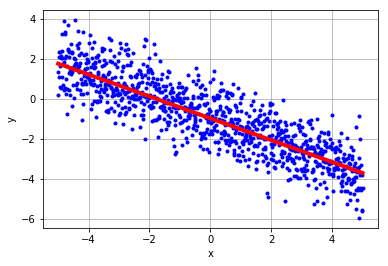

In [380]:
#helper, do not need to change
POLY_DEGREE = 5
NUM_OBS = 1000

rng = np.random.RandomState(seed=4)

true_weight = -rng.rand(POLY_DEGREE + 1, 1)
true_weight[2:, :] = 0
x_all = np.linspace(-5, 5, NUM_OBS)
reg = Regression()
x_all_feat = reg.construct_polynomial_feats(x_all, POLY_DEGREE)
y_all = np.dot(x_all_feat, true_weight) + rng.randn(x_all_feat.shape[0], 1) # in the second term, we add noise to data
# Note that here we try to produce y_all as our training data
plot_curve(x_all, y_all) # Data with noise that we are going to predict
plot_curve(x_all, np.dot(x_all_feat, true_weight), curve_type='-', color='r', lw=4) # the groundtruth information
plt.show()

indices = rng.permutation(NUM_OBS)

In the figure above, the red curve is the true fuction we want to learn, while the blue dots are the noisy observations. The observations are generated by  $Y=X\theta+σ$ , where  σ∼N(0,1)  are i.i.d. generated noise.

Now let's split the data into two parts, namely the training set and test set. The red dots are for training, while the blue dots are for testing.

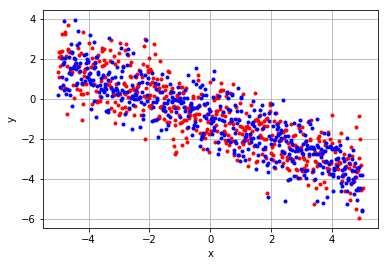

In [381]:
#helper, do not need to change
train_indices = indices[:NUM_OBS//2]
test_indices = indices[NUM_OBS//2:]

plot_curve(x_all[train_indices], y_all[train_indices], color='r')
plot_curve(x_all[test_indices], y_all[test_indices], color='b')
plt.show()

Let's see what we have learned. You only need to run the cell corresponding to your specific implementation.

(10, 6)
(10, 1)


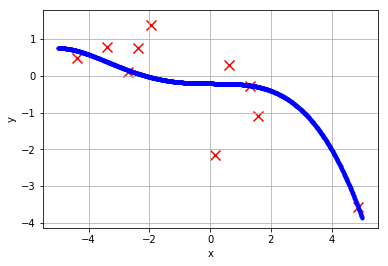

test rmse: 1.3589


In [382]:
#helper, do not need to change
sub_train = train_indices[:10]
print(x_all_feat[sub_train].shape)
print(y_all[sub_train].shape)
weight = reg.ridge_fit_closed(x_all_feat[sub_train], y_all[sub_train], c_lambda=1000)

y_pred = reg.predict(x_all_feat, weight)
plot_curve(x_all, y_pred)
plt.scatter(x_all[sub_train], y_all[sub_train], s=100, c='r', marker='x')
plt.show()

y_test_pred = reg.predict(x_all_feat[test_indices], weight)
test_rmse = reg.rmse(y_test_pred, y_all[test_indices])
print('test rmse: %.4f' % test_rmse)

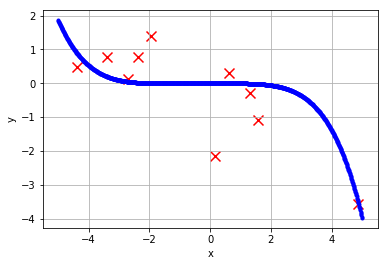

test rmse: 1.5831


In [383]:
#helper, do not need to change
sub_train = train_indices[:10]
weight = reg.ridge_fit_GD(x_all_feat[sub_train], y_all[sub_train], c_lambda=1000, learning_rate=1e-7)

y_pred = reg.predict(x_all_feat, weight)
plot_curve(x_all, y_pred)
plt.scatter(x_all[sub_train], y_all[sub_train], s=100, c='r', marker='x')
plt.show()

y_test_pred = reg.predict(x_all_feat[test_indices], weight)
test_rmse = reg.rmse(y_test_pred, y_all[test_indices])
print('test rmse: %.4f' % test_rmse)

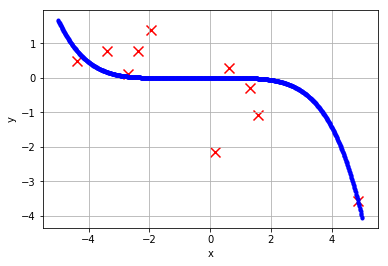

test rmse: 1.5790


In [384]:
#helper, do not need to change
sub_train = train_indices[:10]
weight = reg.ridge_fit_SGD(x_all_feat[sub_train], y_all[sub_train], c_lambda=1000, learning_rate=1e-7)

y_pred = reg.predict(x_all_feat, weight)
plot_curve(x_all, y_pred)
plt.scatter(x_all[sub_train], y_all[sub_train], s=100, c='r', marker='x')
plt.show()

y_test_pred = reg.predict(x_all_feat[test_indices], weight)
test_rmse = reg.rmse(y_test_pred, y_all[test_indices])
print('test rmse: %.4f' % test_rmse)

## 5 Logistic regression [Bonus][15 pts] <span style="color:green">**[W]**</span>

### 5.1 [5 pts]
Consider the logistic regression model that we have seen in class:

$$
p(y|x)=\begin{cases}
			\frac{1}{1+exp(-x\theta)}, & \text{if y = 1}\\
            1-\frac{1}{1+exp(-x\theta)}=\frac{exp(-x\theta)}{1+exp(-x\theta)}, & \text{if y = 0}
		 \end{cases}
$$

Derive the log-likelihood for n data points $\{x_i, y_i\}_{i=1}^n$.

### 5.2 [5 pts]
What is the update rule of the parameter $\theta$ in gradient descent? Assume that the learning rate is $\eta$.

### 5.3 [5 pts]
In another common setting for logistic regression, the possible values for $y$ are 1 and -1. The model then becomes

$$
p(y|x)=\begin{cases}
			\frac{1}{1+exp(-x\theta)}, & \text{if y = 1}\\
            1-\frac{1}{1+exp(-x\theta)}=\frac{exp(-x\theta)}{1+exp(-x\theta)}, & \text{if y = -1}
		 \end{cases}
$$

Derive the log-likelihood and the update rule. Compare the update rules in part 2 and part 3.


## 6 Probabilistic interpretation of linear regression [Bonus][15 pts] <span style="color:green">**[W]**</span>


Consider the linear model 

$$Y = X \theta + \epsilon, $$ 

where $Y \in \mathbb{R}^{n}$ is described by a linear function of features $X \in \mathbb{R}^{n \times d}$. $\theta \in \mathbb{R}^{d}$ is often called weights or parameters. $\epsilon \in \mathbb{R}^{n}$ is the random noise. We assume that the noise for each data point is independent and follows a Gaussian distribution: 

$$\epsilon \sim \mathcal{N}(0, \sigma^2 I_n).$$ 

Recall that in linear regression, our objective is to find an estimator $\hat{\theta}$ that minimizes the least square error:

$$\hat{\theta}_{LSE} = argmin_{\theta}||Y-X \theta||_2^2.$$ 

In this problem, you will prove that minimizing the least-squares error is equivalent to maximizing the likelihood of the data.


### 6.1 [5 pts]
For a datapoint $\{\mathbf{x}^{(i)}, y^{(i)}\}$, what is the likelihood $p(y^{(i)}|\mathbf{x}^{(i)}, \theta)$?
### 6.2 [8 pts]
Show that the log likelihood of $Y$ is 

$$l(\theta) = -\frac{n}{2}\log\left(2\pi \sigma^2\right) - \frac{||Y-X \theta||_2^2}{2\sigma^2}.$$
### 6.3 [2 pts]
Conclude that the maximum likelihood estimator of $\theta$ is equal to $\hat{\theta}_{LSE}$.

